# IMDB Database analysis
Here is an IMDB database I have obtained from year 1960+ to 2015. Using this database, I will try to find out a few interesting/ fun questions as well as exploring the trends in movie making over the years.
Trivia questions:
1. Who are the directors that earned most (top 20)
2. How big of a revenue pie has the top 20 taken up among all directors
3. Who are the actors that appeared in most movies
4. What are the genres that showed up most

In-depth analysis:
1. What are the genres that appeared most and does it equate to higher earnings
2. Does budget and grossing correlate?
3. Does movie rating and grossings correlate?
4. What are the appearance of genre over the years?
5. What are the trends of revenue and budget for each genres over the years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [3]:
df = pd.read_csv('Imdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

why is imdb_id 1 lesser count than id? 

Anyway I will first remove all the columns that are not useful to my analysis.
That would be imdb_id, overview, tagline, homepage, keywords

In [7]:
#Trying to retrieve a specific index by film title
df[df['original_title'] == 'Jurassic World']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
# Drop the unrequired columns
df.drop(columns=['imdb_id','overview','tagline','homepage','keywords'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [10]:
# Realise that release_date is particularly troublesome, it is not propery formatted as mm/dd/yy
# I will change the release_date format to datetime format.
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

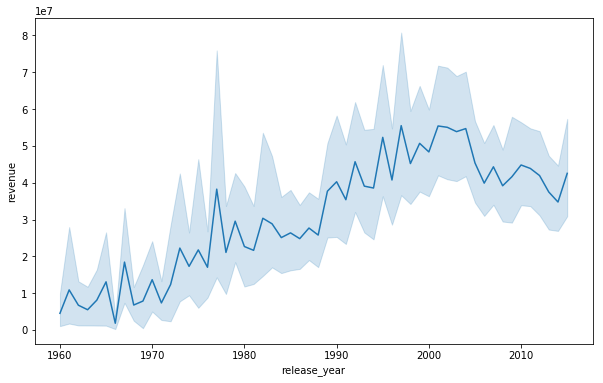

In [12]:
# What are the total revenues earned for all movies over the year(not adjusted to inflation)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='release_year',y='revenue')

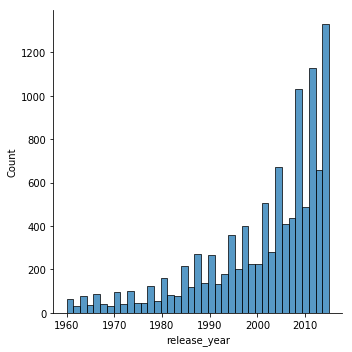

In [13]:
#Number of films released over the years
sns.displot(data=df, x='release_year')

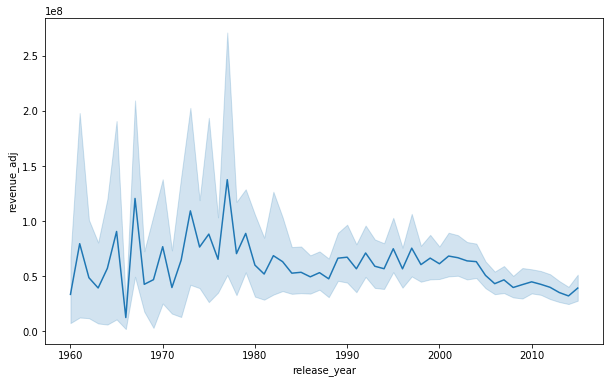

In [14]:
# Revenue adjusted to inflation over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='release_year',y='revenue_adj')

Looking at the result we might comment that ireal revenue falls over the year. This is a premature conclusion as we do not have enough data to provide a more meaningful insight. Some questions we need to ask are:
1. How are the revenues calculated? Does it include ticket sales? I suppose yes. 
2. Are the revenues accounted for global sales or American sales only?

### Let's see what are the movies that grossed highest (top 10) for both with and without inflation adjustment

In [15]:
# First we set original_title to index, then filter revenue from highest to lowest.
df.set_index('original_title').sort_values('revenue',ascending=False)['revenue'].head(10)

original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1519557910
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1274219009
Iron Man 3                                      1215439994
Name: revenue, dtype: int64

In [16]:
# Top 10 movies adjusted to inflation
df.set_index('original_title').sort_values('revenue_adj',ascending=False)['revenue_adj'].head(10)

original_title
Avatar                            2.827124e+09
Star Wars                         2.789712e+09
Titanic                           2.506406e+09
The Exorcist                      2.167325e+09
Jaws                              1.907006e+09
Star Wars: The Force Awakens      1.902723e+09
E.T. the Extra-Terrestrial        1.791694e+09
The Net                           1.583050e+09
One Hundred and One Dalmatians    1.574815e+09
The Avengers                      1.443191e+09
Name: revenue_adj, dtype: float64

## We will now calculate the total revenue shared by the top 20 directors and the pie they share themselves
- First we create a new pandas dataframe that only has 2 columns. Directors and aggregate revenue

In [17]:
# Creating a new df called director that groupby director's sum revenue
director = df.groupby(by='director',as_index=False).sum()
director.sort_values('revenue',ascending=False,inplace=True)
# As we only want to look at top 20 directors, we with insert a new row by summing all other directors into that row
director = director.append({'director':'All the rest','revenue':director['revenue'].iloc[20:].sum()},ignore_index=True)

In [18]:
# Total revenue earned by directors excluding top 20
director.iloc[-1]

director        All the rest
id                       NaN
popularity               NaN
budget                   NaN
revenue         350851862577
runtime                  NaN
vote_count               NaN
vote_average             NaN
release_year             NaN
budget_adj               NaN
revenue_adj              NaN
Name: 5067, dtype: object

In [19]:
#create new dataframe with only the top 20 directors
director_pie = director.iloc[:20]
#director_pie = director_pie.append(director.iloc[-1])

In [20]:
director_pie.reset_index()

,index,director,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,Steven Spielberg,503569.0,54.378995,1.589950e+09,9018563772,3900.0,36735.0,197.9,57818.0,2.151770e+09,1.520245e+10
1,1,Peter Jackson,268469.0,49.067904,1.326776e+09,6523244659,1853.0,31796.0,91.0,26017.0,1.375725e+09,7.019848e+09
2,2,James Cameron,183703.0,29.098111,7.600458e+08,5841894863,1206.0,21784.0,68.3,19930.0,1.030992e+09,7.327221e+09
3,3,Michael Bay,305181.0,22.254874,1.360000e+09,4917208171,1614.0,17477.0,69.6,22052.0,1.501996e+09,5.460672e+09
4,4,Christopher Nolan,290804.0,61.955206,1.005000e+09,4167548502,1207.0,41759.0,74.7,20052.0,1.014694e+09,4.164262e+09
5,5,David Yates,54532.0,20.815974,7.750000e+08,4154295625,661.0,13834.0,35.7,10042.0,7.830252e+08,4.177455e+09
6,6,Robert Zemeckis,500495.0,33.619667,1.025700e+09,3869690869,2010.0,21532.0,114.0,33924.0,1.328678e+09,5.655648e+09
7,7,Chris Columbus,355516.0,31.514525,6.270000e+08,3851491668,1685.0,15169.0,89.6,27987.0,7.407345e+08,5.094077e+09
8,8,Tim Burton,367754.0,34.648225,1.113060e+09,3665414624,1830.0,17319.0,126.2,37963.0,1.328826e+09,4.529285e+09
9,9,Ridley Scott,765883.0,46.213770,1.482900e+09,3649996480,2985.0,24801.0,149.0,45970.0,1.740157e+09,4.219566e+09


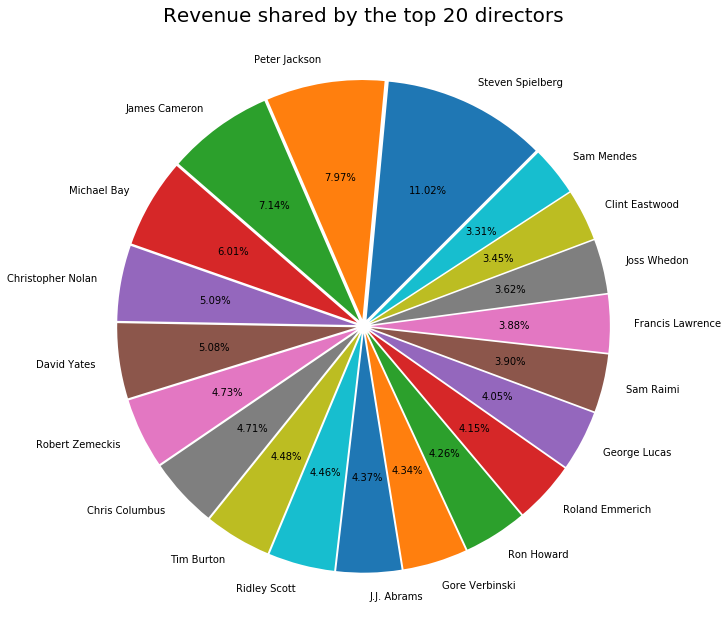

In [21]:
#Here we create a pie chart to look at revenue shared by the top 20 directors. 
fig1, ax1 = plt.subplots(figsize=[18,11])
label = director_pie['director']
x = director_pie['revenue']
ax1.pie(labels=label,x=x,autopct='%1.2f%%',
        startangle=45,explode=[0.03]*20)
plt.title("Revenue shared by the top 20 directors", fontsize=20);

In [22]:
#How many % does the top 20 grossing directors earn compare to all others?
t20 = (director_pie['revenue'].sum()/ director['revenue'][:-1].sum() *100 ) #remember not to include the last row
total_directors = df['director'].nunique()-1
print ('The top 20 directors grossed {:.2f}% of total revenue earned from total of {} directors' .format(t20,total_directors))

The top 20 directors grossed 18.92% of total revenue earned from total of 5066 directors


## Let's tackle another question: What are the genre's that received the highest rating, what are the genres that grossed highest. 

In [23]:
df['genres'].head()
# Here we can see that there are multiple genres can exist in 1 title

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

### Create a barplot to illustrate the count per each genres
Create a function: 
1. First we concatenate all genres into a long list
2. Then from the list, we split each genre by '|' and then store in it a pandas Series
3. Use value_counts() function to iterate through the series and aggregate count of each genres and call this series Data
4. return the series Data

In [24]:
#The following function can give all the counts for per category 
def extract_count(column_name):
    data = column_name.str.cat(sep = '|')# put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

In [25]:
#Here's how it works
data = df['genres'].str.cat(sep= '|')
data = pd.Series(data.split('|'))
count=data.value_counts(ascending=False)
count

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [26]:
extract_count(df['genres'])

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [27]:
# Here we create a new Series call genre_count that store information of genres count
genre_count = extract_count(df['genres']) 
# Transform the series into a dataframe
df_genre_count = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values})

Text(0.5, 0, 'Occurance')

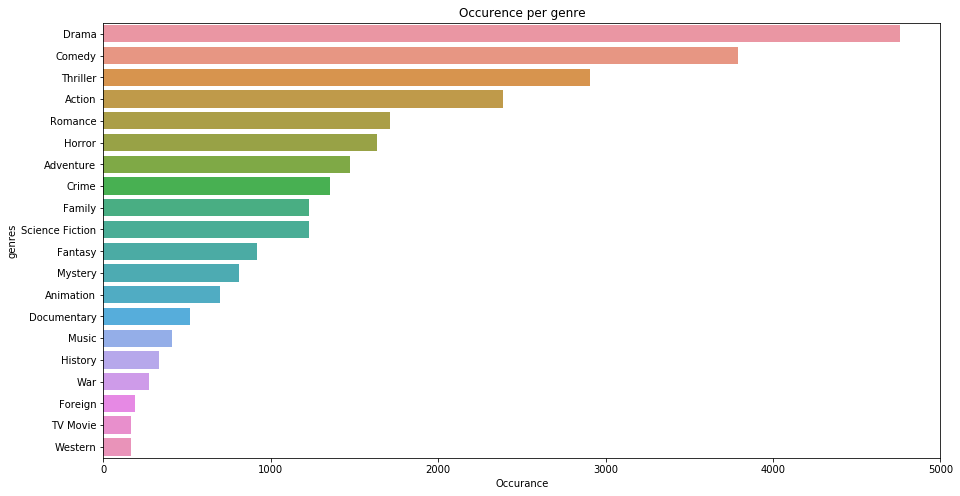

In [28]:
# Using the new DataFrame df_genre_count, we will plot a distribution table
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=df_genre_count,y='genres',x='count')
ax.set_title('Occurence per genre')
ax.set_xlabel('Occurance')

## Here I would like to see what is the revenue earned per genre
### This isn't as clear cut as counting the occurance because of the multiple genres assigned to each movie
1. Here I will create a new DataFrame by iterate through each movies, and split the genres into a few rows while retaining all other information

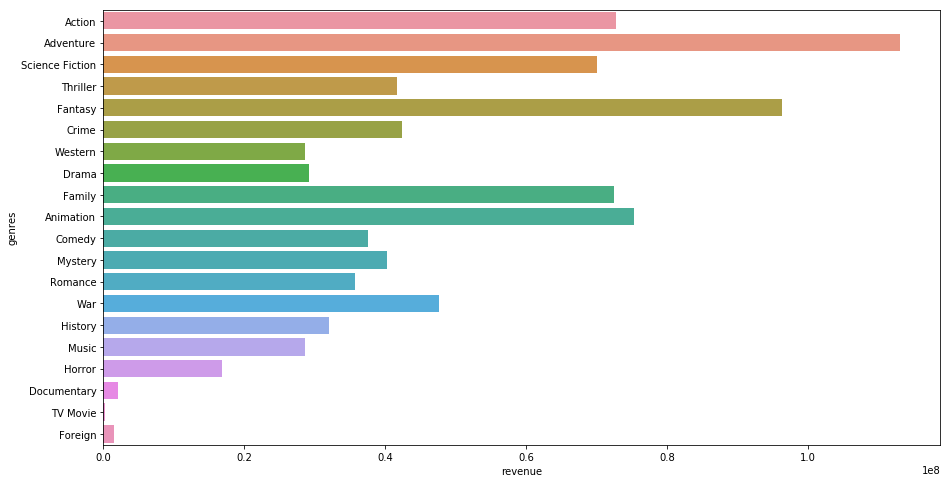

In [29]:
# First create a new column for genres using .assign() by replacing the ori genres by splitting the genres into a list.
# Then use .explode() function to duplicate each genres row while retaining other infos
# Because using .explode() will create duplicated index will same value, .reset_dex() is used to reset the index number.
df_genre_split = df.assign(genres = df['genres'].str.split('|')).explode('genres').reset_index(drop=True)
f1,ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(data=df_genre_split,x='revenue',y='genres',ci=None)

In [30]:
df_genre_split.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Text(0.5, 1.0, 'Does budget correlate to revenue?')

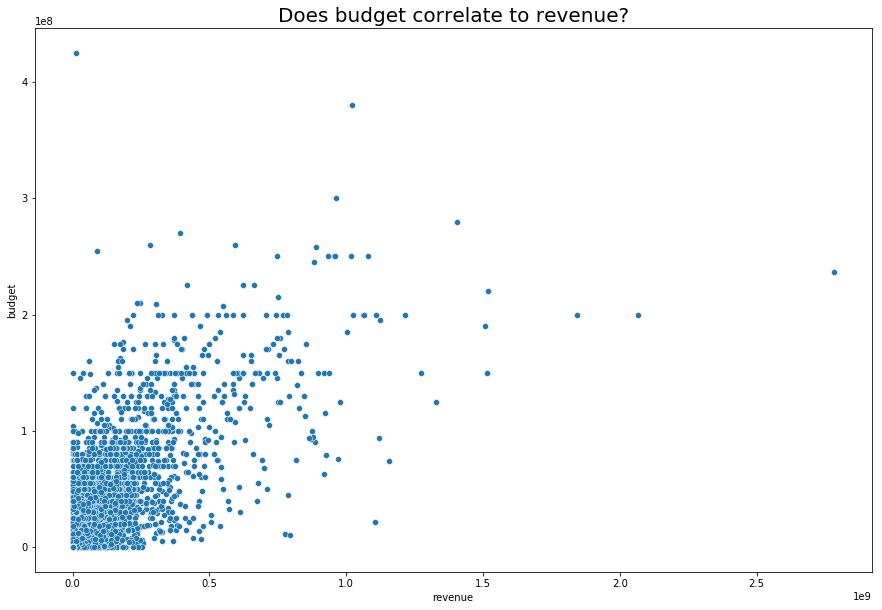

In [31]:
f2,ax2 = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df,x='revenue',y='budget')
ax2.set_title('Does budget correlate to revenue?',fontsize=20)

Text(0, 0.5, 'Ratings')

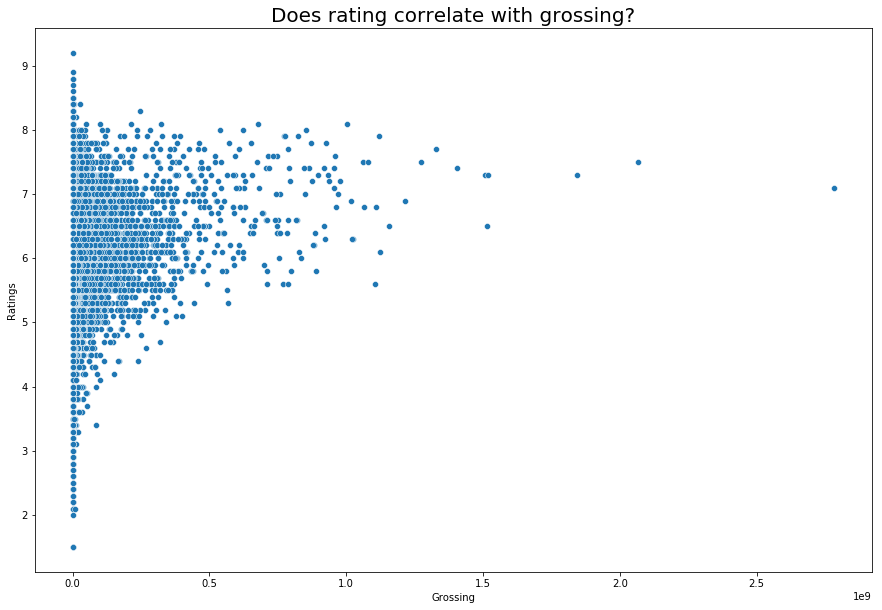

In [32]:
f3,ax3 = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df,x='revenue',y='vote_average')
ax3.set_title('Does rating correlate with grossing?',fontsize=20)
ax3.set_xlabel("Grossing")
ax3.set_ylabel("Ratings")

In [33]:
#df.iplot(kind='scatter',x='revenue',y='vote_average',mode='markers',size=5)

In [34]:
#Just curious, who is the actor/actress that has acted in most movies
df_actor_count = extract_count(df['cast'])

In [35]:
df_actor_count.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Julianne Moore        47
Alec Baldwin          47
Johnny Depp           46
Tom Hanks             46
Gene Hackman          46
Christopher Walken    46
Dennis Quaid          45
Sylvester Stallone    45
Willem Dafoe          45
dtype: int64

## We will now create a graph to demonstrate the relationship between budget spent on each genre each year
1. First we need to groupby genre and release year, Genre will be the leading index and years will be second
2. Then we use pivot table to put genre as index, year as columns and values will be budget.
3. lastly create a heatmap to plot in the datas

Text(0.5, 1.0, 'Budget used on each genre over the years')

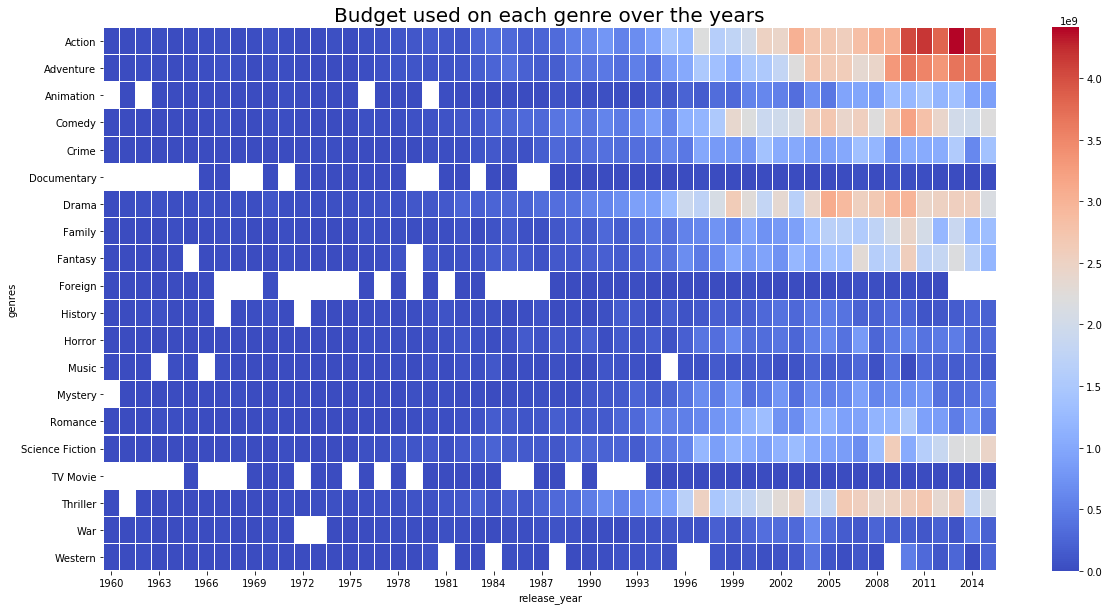

In [41]:
#Here I will use dataframe that has each title's genres split out. Although this might overrepresent films that has more genres, however this is a fairer method as all genres involved are accountent for. 
# First we create a multi-indexed df with index - genre and subindex - release year. We use sum to add up the total budgets
genre_year = df_genre_split.groupby(['genres', 'release_year']).sum().sort_index()
# Then we create another df with pivot table.
df_gyBudget = genre_year.pivot_table(index=['genres'], columns=['release_year'], values='budget',) #not using aggfunc because the data has was groupby the sum function earlier.


# creating a heatmap
f, axA = plt.subplots(figsize=(20,10))
sns.heatmap(df_gyBudget, xticklabels=3, linewidths=0.02, ax=axA, cmap='coolwarm')
axA.set_title('Budget used on each genre over the years',fontsize=20)

## Essentially the same thing as above except its Revenue

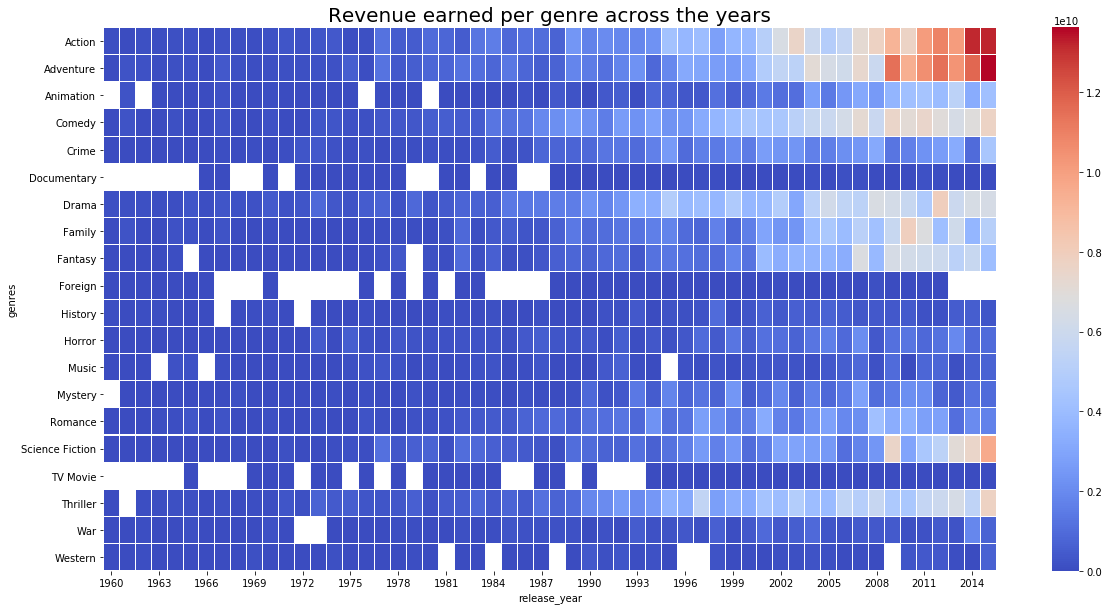

In [40]:
genre_year = df_genre_split.groupby(['genres', 'release_year']).sum().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genres'], columns=['release_year'], values='revenue')
f, axB = plt.subplots(figsize=(20,10))
axB.set_title('Revenue earned per genre across the years',fontsize=20)
sns.heatmap(df_gyBudget, xticklabels=3, linewidths=0.02, cmap='coolwarm')